# 1. Preliminares

## 1.1 Descripción del problema

Se nos presenta una base de datos con 30.000 tweets y el sentimiento asociado a cada uno de estos. La base contiene 2 columnas, "content" y "sentiment", la primera corresponde al tweet, y la segunda al sentimiento asociado a este. Cabe destacar que existen 13 tipos de sentimientos difrentes, los cuales se deben clasificar en 2 tipos, positivos y negativos. Con esta información debemos generar 5 modelos de clasificación que nos permitan al momento de entregar o ingresar un nuevo tweet predecir si este está asociado a un sentimiento positivo o negativo. Una vez listos los modelos se debe evaluar cual o de estos nos entregan el mejor resultado, considerando para ello los resultados obtenidos mediante las metricas de evaluación de problemas de clasifición, tales como Recall Precision, F1 y área bajo la curva ROC.

## 1.2 Objetivos

* Crear un modelo predictivo de clasificación que nos permita predecir con la mayor exactitud posible si un tweet está asociado a un sentimiento positivo o negativo.

## 1.3 Implementación

* 1 - Leemos mediante pd.read la base "training_tweets"
* 2 - Eliminamos la columna "Unnamed: 0"
* 3 - Realizamos un análisis exploratorio del vector objetivo "sentiment".
* 4 - Recodificamos el vector objetivo "sentiment", agrupando los 13 difrentes tipos de sentimientos existentes entre prositivos y negativos según lo indicado, considerando para esto la distribución del sentimiento "neutral" de forma aleatorea entre positivo y negativo.
* 5- Una vez recodificado el vector objetivo "sentiment", lo binarizamos mediante la clase LabelEncoder.
* 6 - Generaremos una función llamada "txt_preprocessor", la cual realizará una limpieza del texto entregado, cambiando todas las letras a minúscula y eliminando todos aquellos caracteres que no sean letras, esta queda alojada en archivo auxiliar funciones.py
* 7 - Tokenizamos los tweets para realizar el proceso de normalización de texto mediante lematización.
* 8 - Vectorizaremos cada tweet mediante CountVectorizer, definiremos aquellas palabras que no se consideraran mediante stopwords y proprocesamos el texto con la función "txt_preprocessor".
* 9 - Realizamos el fit_transform a la columna "content".
* 10 - Generamos un DataFrame llamado df_tweets, que contiene los vectores de las palabras con sus respectivos nombres.
* 11 - Realizamos la división de muestras de entrenamiento y validación, en donde nuestro vector objetivo (y) correspondera a la columna binarizada "sentiment", y los atributos (X) a todas los columnas de df_tweets.
* 12 - Implementaremos 5 modelos de clasificación a los cuales se le realizará una busqueda de grilla para encontrar los mejores hiperparametros para cada uno de ellos.
* 13 - Una vez implementados los 5 modelos, obtendremos las métricas de desempeño para cada uno de ellos (Recall Precision, F1 y área bajo la curva ROC), en base a estos resultados, escogeremos los 2 modelos que presenten el mejor (desepeño).
* 14 - Serializamos los 2 modelos escogidos bajo la siguiente nomenclatura nombre_grupomodelo-1 y nombre_grupo-modelo-2 y los enviamos a evaluación.

## 1.4 Criterios de optimización y métricas de desempeño

Para evaluar los modelos de clasificación se utilizarán principalmente las siguientes métricas:
* __Precision__: exactitud del modelo para predecir una clase, en porcentaje.
* __Recall__: capacidad del modelo de recordar las etiquetas reales, en porcentaje.
* __F1__: promedio entre precision y recall, que penaliza diferencias entre las métricas
* __ROC_AUC__ (valor del área bajo la curva ROC): métrica que captura las distintas combinaciones de TPR Y FPR posibles de alcznar, resumiendo en un valor que va de 0 a 1 la capacidad del modelo en predecir las etiquetas correctamente. 

# 2. Aspectos Computacionales

In [21]:
# Numpy: librería escencial para procesos matemáticos utilizados en data science
import numpy as np
# Pandas: librería para la creación y manipulación de estructura de datos
import pandas as pd
# Matplotlib: librería basada en Matlab, utilizada para realizar gráficos en 2D
import matplotlib.pyplot as plt
# Seaborn: librería avanzada para gráficos
import seaborn as sns
# Función para visualizar de forma gráfica los valores perdidos
from missingno import matrix
# Importación de funciones creadas 
import funciones as fn

# Importación de función para respuesta aleatoria
from random import choice
# Librería para funciones con expresiones regulares
import re
# Librería con funciones asociadas al tipo de dato 'string'
import string


# Clase para instanciar vectorizador CountVectorizer y TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Clase para realizar una codificación de variable categórica
from sklearn.preprocessing import LabelEncoder

# Clase para instanciar modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
# Clase para instanciar modelo de Gradient Boosting
from xgboost import XGBClassifier
# Clase para instanciar modelo de Regresión lógistica
from sklearn.linear_model import LogisticRegression
# Clase para instanciar modelo de support vector machine
from sklearn.svm import SVC
# Importación de métricas para problemas de clasificación
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
# Clase para instanciar modelo de Naive Bayes para problemas de clasificación binarios
from sklearn.naive_bayes import BernoulliNB
# Función para estratificación de la muestra
from sklearn.model_selection import StratifiedKFold
# Clase para realizar busqueda de grilla con validación cruzada
from sklearn.model_selection import GridSearchCV
# Objeto para instanciar  Regresión Logística
from sklearn.linear_model import LogisticRegression

# Arquitectura secuencial para modelos de redes neuronales
from tensorflow.keras.models import Sequential
# Clase para conexciónes densamente pobladas
from tensorflow.keras.layers import Dense

# Importación de librerías y funciones para natural lenguage processing
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/fernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fernando/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Estilo gráficos
plt.style.use('ggplot')

In [3]:
# Importación de la base
train = pd.read_csv('training_tweets.csv').drop(columns='Unnamed: 0')
train['sample'] = 'train'
test = pd.read_csv('text_emotion.csv').drop(columns=['tweet_id', 'author'])
test['sample'] = 'test'
df = pd.concat([train, test], sort=True, ignore_index=True)
print('Las dimensiones de la base son: {} filas y {} columnas'.format(df.shape[0], df.shape[1]))

Las dimensiones de la base son: 70000 filas y 3 columnas


# 3. Análisis Exploratorio ex-ante Preproceso

In [4]:
# Exploración de features y el tipo de datos correspondientes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
content      70000 non-null object
sample       70000 non-null object
sentiment    70000 non-null object
dtypes: object(3)
memory usage: 1.6+ MB


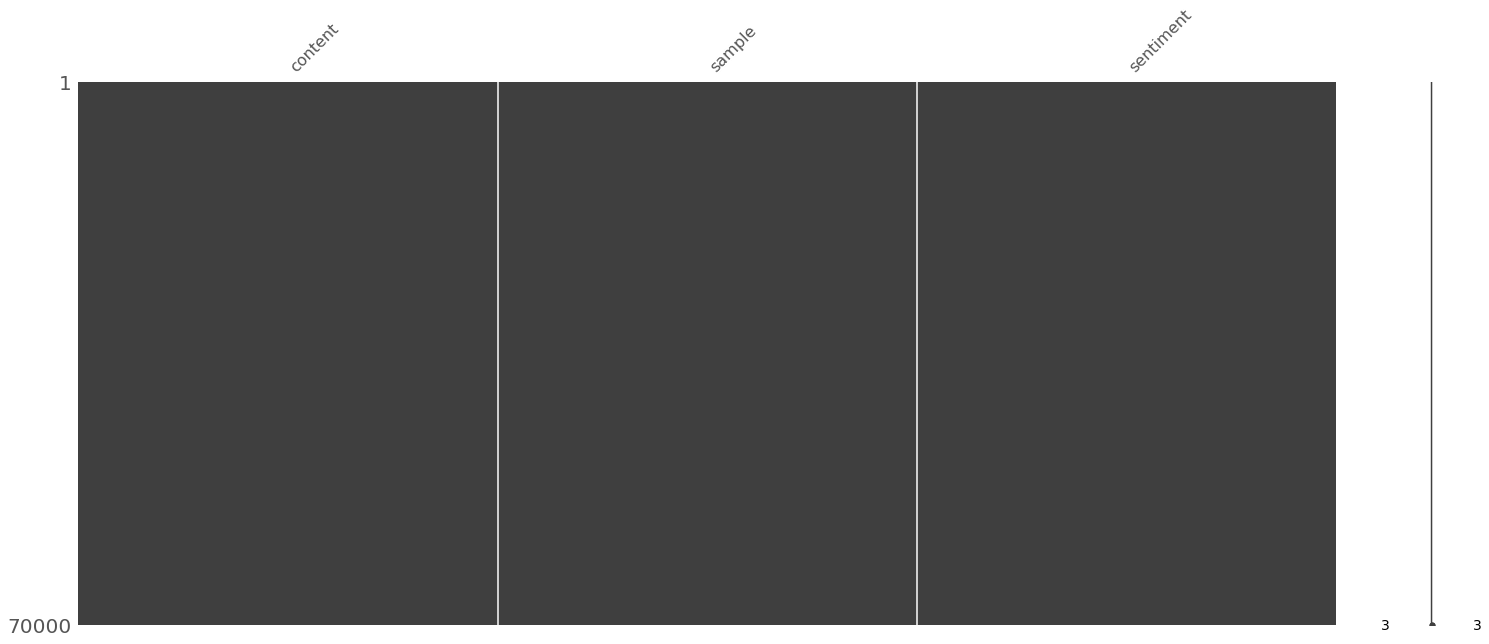

In [5]:
# Visión general de datos perdidos
matrix(df)

__Comentario__: Se puede observar del siguiente gráfico que no existen datos con valores perdidos.

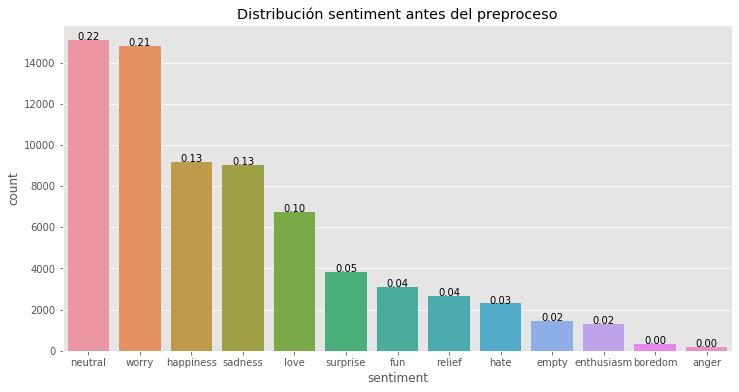

In [6]:
# Distribución de 1º Target
plt.figure(figsize=(12,6))
ax = sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .5,
        '{:1.2f}'.format(height/len(df['sentiment'])), ha="center")
plt.title('Distribución sentiment antes del preproceso')
plt.show()

__Comentario:__ Se observa una distribución de "sentimeintos" variada y en tanto frecuencias relativas como de clases en los tweets de la base. Cabe destacar la importante proporción (22%) de casos clasificados como neutrales y worry con un 21%. Seguidos estan los sentimientos relacionados a 'happiness' y 'sadness' con un 13% y 'love' que ocupa un 10%, entre un 5% y un 2% tenemos los restantes tipos de sentimientos como 'enthusiasm', 'empty', 'hate', 'relief', 'fun' y 'surprise'. Finalmente los que tenemos en menor cantidad son 'boredom' y 'anger' con menos del 1% de los registros.

# 4. Feature engineering

In [7]:
# Recodificación de sentimientos entre positivos y negativos
emotions = {'worry': 'negative', 'happiness': 'positive', 'sadness': 'negative',
              'love': 'positive', 'surprise': 'positive', 'fun': 'positive',
              'relief': 'positive', 'hate': 'negative', 'empty': 'negative', 
              'enthusiasm': 'positive', 'boredom': 'negative', 'anger': 'negative'}
              #, 'neutral': choice(['positive', 'negative'])

df['sentiment'] = df['sentiment'].replace(emotions)
# Borrar las filas con sentimiento 'neutral'
df = df[df['sentiment'] != 'neutral'].reset_index()
# Aplicamos label encoder
lbl_encoder = LabelEncoder()

df['sentiment'] = lbl_encoder.fit_transform(df['sentiment'])
print('0: {} y 1: {}'.format(lbl_encoder.classes_[0], lbl_encoder.classes_[1]))

0: negative y 1: positive


In [8]:
# Definición de Stop Words
custom_stop_words = ['http', 'day']
modified_stop_words = stopwords.words('english') + custom_stop_words

In [9]:
# Exploración de las palabras 
count_vectorizer = CountVectorizer(stop_words=modified_stop_words, 
                                   preprocessor=fn.text_preprocessor, min_df=4)
disp_matrix = count_vectorizer.fit_transform(df['content'])
# Exploración de las palabras 
#tfidf_vectorizer = TfidfVectorizer(stop_words=modified_stop_words, 
#                                   preprocessor=fn.text_preprocessor, min_df=4)
#disp_matrix = tfidf_vectorizer.fit_transform(df['content'])
print('Matriz dispersa de {} filas y {} columnas'.format(disp_matrix.shape[0], disp_matrix.shape[1]))

/Users/fernando/miniconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Matriz dispersa de 54911 filas y 9112 columnas


In [10]:
# Separación de muestras entre muestra de entrenamiento y validación
df_tweets = pd.DataFrame(disp_matrix.toarray(), columns=count_vectorizer.get_feature_names())
#df_tweets = pd.DataFrame(disp_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())

X = df_tweets
y = df['sentiment']
train_index = df[df['sample'] == 'train'].index
test_index = df[df['sample'] == 'test'].index

X_train = df_tweets.loc[train_index, :]
X_test = df_tweets.loc[test_index, :]
y_train = df['sentiment'][train_index]
y_test = df['sentiment'][test_index]

# 5. Análisis Exploratorio ex-post Preproceso

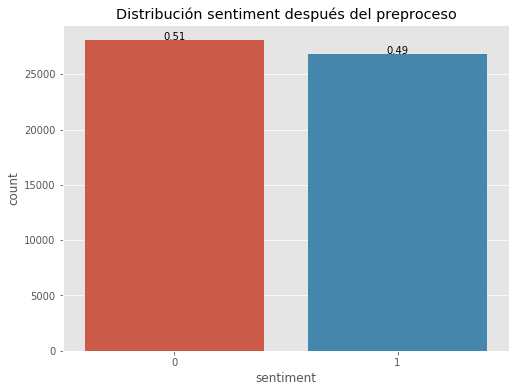

In [11]:
# Distribución de 1º Target
plt.figure(figsize=(8,6))
ax = sns.countplot(x='sentiment', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .5,
        '{:1.2f}'.format(height/len(df['sentiment'])), ha="center")
plt.title('Distribución sentiment después del preproceso')
plt.show()

__Comentario:__ Se observa una distribución bastante balanceada entre los tweets asociados a emociones negativas (0) y positivas (1), sienda esta la clase con mayoría con un 60% de la muestra.

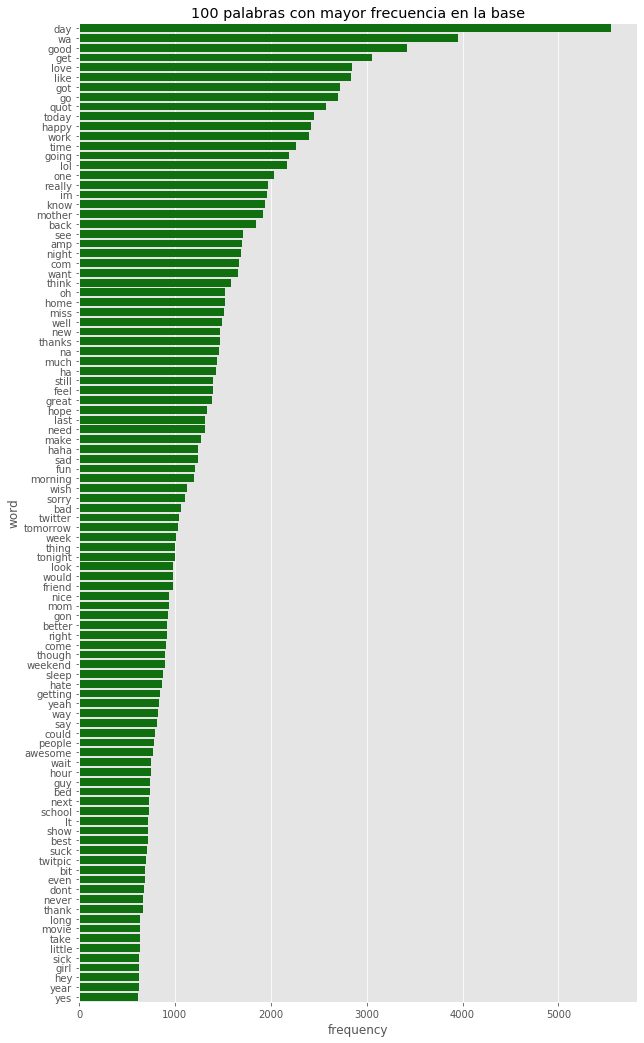

In [12]:
# Generar variables con las palabras y sus cantidades
words = count_vectorizer.get_feature_names()
count_words = disp_matrix.toarray().sum(axis=0)

# Creación de DataFrame y posterior orden
df_words = pd.DataFrame({'word': words, 'frequency': count_words}).sort_values('frequency', ascending=False)[:100]

# Gráfico de las 100 palabras más repetidas
plt.figure(figsize=(10,18))
sns.barplot(x='frequency', y='word', data=df_words, color='green')
plt.title('100 palabras con mayor frecuencia en la base')
plt.show()

In [13]:
# 50 palabras principales por sentimiento
fn.get_words(df, 'sentiment', 'content', n_words=50, vectorizer=count_vectorizer)


1
 ['day', 'love', 'good', 'happy', 'wa', 'mother', 'quot', 'lol', 'like', 'got', 'get', 'thanks', 'time', 'today', 'go', 'great', 'com', 'going', 'see', 'one', 'night', 'haha', 'amp', 'new', 'really', 'fun', 'back', 'know', 'work', 'well', 'im', 'morning', 'oh', 'much', 'hope', 'home', 'mom', 'nice', 'think', 'ha', 'want', 'awesome', 'na', 'last', 'make', 'twitter', 'thank', 'look', 'still', 'best']

0
 ['day', 'wa', 'get', 'go', 'work', 'like', 'got', 'today', 'going', 'im', 'good', 'sad', 'miss', 'really', 'time', 'know', 'one', 'quot', 'feel', 'want', 'back', 'sorry', 'think', 'still', 'need', 'bad', 'na', 'home', 'oh', 'hate', 'amp', 'lol', 'ha', 'night', 'see', 'much', 'well', 'last', 'make', 'wish', 'com', 'suck', 'hope', 'new', 'thing', 'sleep', 'love', 'sick', 'tomorrow', 'gon']


__Comentario:__ Se observan de ambos gráficos la variedad de palabras con mayor frecuencia: en el primer gráfico de manera transversal a toda la base y en el segundo las 50 más repetidas en cada sentimiento. Se observa que a priori hay holgura en mejorar el preproceso y vectorización, habiendo palabras que se repiten en ambas clases (por lo tanto poco informativas) y otras palabras que por su naturaleza es inferible su poca relación con el fenómeno que hay detrás de generar el sentimiento asociado. Este proceso de 'tunning' del preproceso y vectorización se continuará e iterará en las próximas entregas.

# 6 Modelamiento

## 6.1 Naive Bayes

In [14]:
strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

naive_bayes = BernoulliNB()
param_grid_nb = {'alpha': [.2,.4,.6, 1], 'fit_prior':[True, False]}
grid_nb = GridSearchCV(naive_bayes, param_grid_nb, cv=strat)
fn.clf_metrics(grid_nb, X_train, y_train, X_test, y_test)

{'alpha': 1, 'fit_prior': True}
ROC_Score:
0.789
Confusion_Matrix:
[[13107  2956]
 [ 3642 11657]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     16063
           1       0.80      0.76      0.78     15299

    accuracy                           0.79     31362
   macro avg       0.79      0.79      0.79     31362
weighted avg       0.79      0.79      0.79     31362

Realizado en 269.527s


# 6.2 XGBoost

In [35]:
xgb = XGBClassifier()
param_grid_xgb = {'learning_rate': np.arange(.10, .13, .005), 
                  'max_depth': [2, 3, 4], 
                  'n_estimators': [40, 50, 70]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=2)
fn.clf_metrics(grid_xgb, X_train, y_train, X_test, y_test)

## 6.3 Support Vector Machine

In [ ]:
# Support Vector Machine
svm = SVC(random_state=123)
param_grid_svm = {'kernel': ['rbf', 'linear'],
             'C': [.5, .7, 1], 
              'gamma': ['scale', 'auto']
                }
grid_svm = GridSearchCV(svm, param_grid_svm, n_jobs=-1, cv=2)
fn.clf_metrics(grid_svm, X_train, y_train, X_test, y_test)

## 6.4 Logistic Regression

In [34]:
# Logistic Regression
log = LogisticRegression(random_state=123)
param_grid_log = {#'C': [.5, .7, 1, 1.5, 2],
                  'penalty': ['l2', 'l1', 'elasticnet']}
grid_log = GridSearchCV(log, param_grid_log, n_jobs=-1, cv=2)
fn.clf_metrics(grid_log, X_train, y_train, X_test, y_test)

/Users/fernando/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'penalty': 'l2'}
ROC_Score:
0.811
Confusion_Matrix:
[[13287  2776]
 [ 3143 12156]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     16063
           1       0.81      0.79      0.80     15299

    accuracy                           0.81     31362
   macro avg       0.81      0.81      0.81     31362
weighted avg       0.81      0.81      0.81     31362

Realizado en 62.057s


## 6.5 Red Neuronal

In [17]:
# Instanciamos la Red Neuronal
input_dim = (X_train.shape[1],)
neurons = np.ceil(X_train.shape[1]/2)

model = Sequential()
model.add(Dense(20, activation='relu', use_bias=True, input_shape=input_dim, name='Primera_capa'))
model.add(Dense(1, activation='sigmoid', use_bias=True, name='output'))
model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Primera_capa (Dense)         (None, 20)                182260    
_________________________________________________________________
output (Dense)               (None, 1)                 21        
Total params: 182,281
Trainable params: 182,281
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit del modelo
model.fit(x=X_train, y=y_train, batch_size=512, epochs=50, validation_data=(X_test, y_test))

Train on 23549 samples, validate on 31362 samples
Epoch 1/50
23549/23549 [==============================] - 5s 227us/sample - loss: 0.6863 - accuracy: 0.6102 - val_loss: 0.6784 - val_accuracy: 0.6938
Epoch 2/50
23549/23549 [==============================] - 2s 97us/sample - loss: 0.6730 - accuracy: 0.7113 - val_loss: 0.6678 - val_accuracy: 0.7261
Epoch 3/50
23549/23549 [==============================] - 2s 101us/sample - loss: 0.6625 - accuracy: 0.7376 - val_loss: 0.6587 - val_accuracy: 0.7389
Epoch 4/50
23549/23549 [==============================] - 3s 126us/sample - loss: 0.6535 - accuracy: 0.7480 - val_loss: 0.6508 - val_accuracy: 0.7443
Epoch 5/50
23549/23549 [==============================] - 3s 118us/sample - loss: 0.6457 - accuracy: 0.7542 - val_loss: 0.6439 - val_accuracy: 0.7477
Epoch 6/50
23549/23549 [==============================] - 2s 100us/sample - loss: 0.6388 - accuracy: 0.7574 - val_loss: 0.6379 - val_accuracy: 0.7512
Epoch 7/50
23549/23549 [===========================

In [26]:
# Predecir la muestra de validación
y_hat = model.predict(X_test)
y_hat = [1 if i >= .5 else 0 for i in y_hat]
# Métricas
metrics = {'ROC_Score': roc_auc_score(y_test, y_hat).round(3),
           'Confusion_Matrix': confusion_matrix(y_test, y_hat).round(3),
           'Classification_Report': classification_report(y_test, y_hat)}
for key, value in metrics.items():
    print('{}:\n{}'.format(key, value))

ROC_Score:
0.777
Confusion_Matrix:
[[12899  3164]
 [ 3811 11488]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79     16063
           1       0.78      0.75      0.77     15299

    accuracy                           0.78     31362
   macro avg       0.78      0.78      0.78     31362
weighted avg       0.78      0.78      0.78     31362

